<a href="https://colab.research.google.com/github/Fhayes3/ds-projects/blob/main/Fred_HayesSupervisedLearningF_Project_LearnerNotebook_Final_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Libraries necessary to split the data into train and test
from sklearn.model_selection import train_test_split

#Libraries necessary to build linear regression_model
import statsmodels.api as sm

#Libraries necessary to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Library to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Library to test for Homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Loading the dataset

In [ ]:
#data upload
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

dr = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))


TypeError: ignored

In [ ]:
# I like to create a copy before doing anything else so that original remains unchanged throughout the process
df = dr.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
#code to take a peak at the first five rows of the sample set
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
#code to take a look the shape of the sample
df.shape

(3454, 15)

The sample contains 3454 rows and 15 columns

In [ ]:
#code to examine the data types in the sample
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

The above is a listing of all dataset columns and their corresponding data types.

In [ ]:
#Code to provide the numerical break downs of all numerically based columns
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


The above is a table containing count, mean, standard deviation, min, quartiles and max for all numerical based columns in the data set.

In [ ]:
#Code to display the number of null values in the dataset by column
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

The above is a listing of null values in the dataset. Main Camera is missing 179 values of 19.3% or all total values.

In [ ]:
#Code to display the number of duplicated rows in the dataset
df.duplicated().sum()

0

The above demonstrates that there are no duplicated values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

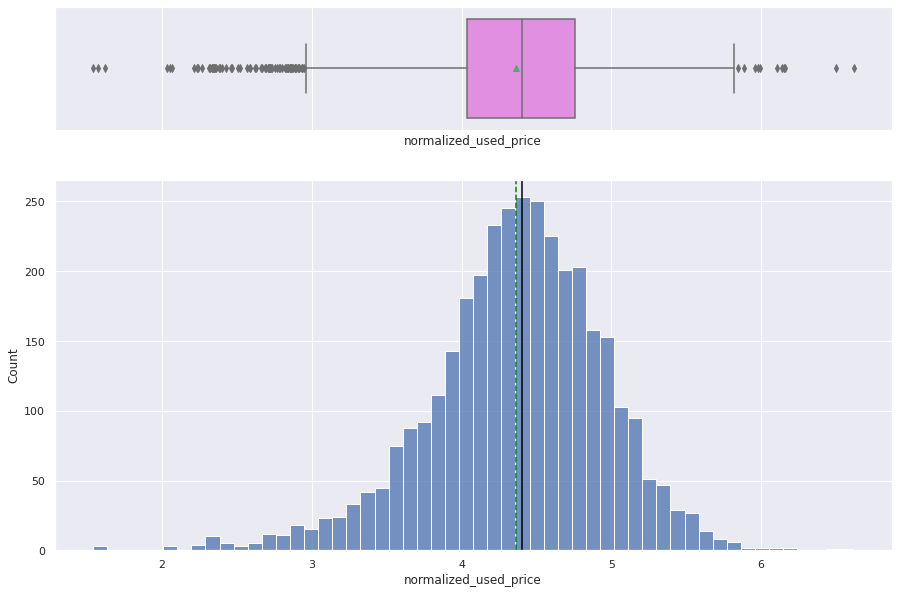

In [ ]:
#Code to create a display featuring both a boxplot and a histogram 
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

histogram_boxplot(df, "normalized_used_price")

1. What does the distribution of normalized used device prices look like? 

The graph itself looks normally distributed. Normalized used price median is around 4.4

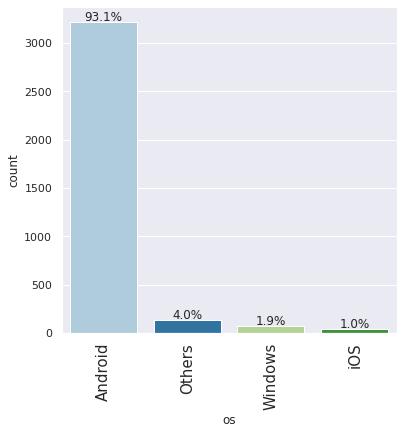

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
labeled_barplot(dr, "os", perc=True)

# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

2. What percentage of the used device market is dominated by Android devices?
 
 93.1 Percent of the used device market is dominated by Android devices.

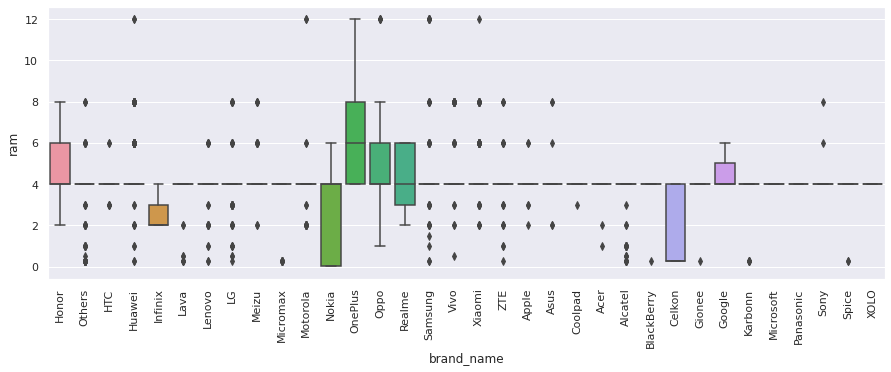

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand? 

The numbers are all over the place and brands are very spread out.

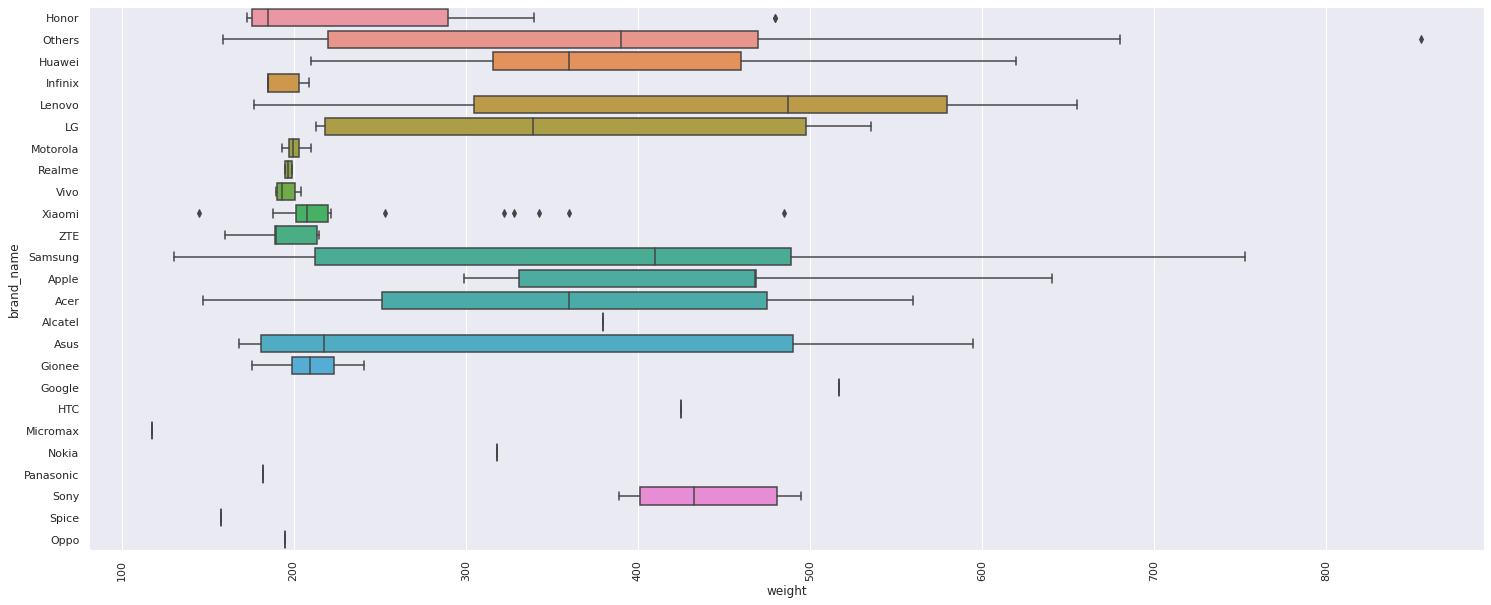

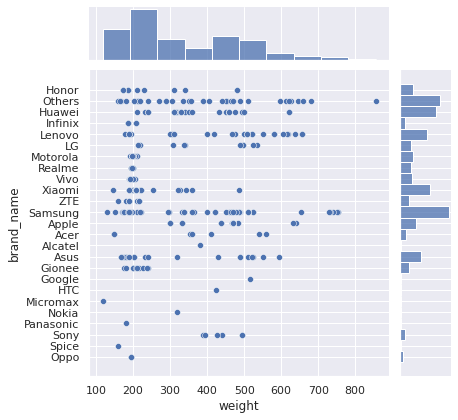

In [ ]:
#import numpy as np; np.random.seed(0)
#import matplotlib.pyplot as plt
#import pandas as pd
dr_battery_size = dr[dr.battery > 4500]



plt.figure(figsize=(25, 10))
sns.boxplot(data=dr_battery_size, x='weight', y='brand_name')
plt.xticks(rotation=90)
plt.show()
sns.jointplot(data=dr_battery_size, x='weight', y='brand_name');

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

Again, going by brand makes analyses difficult due to the number of brands and instances of each.

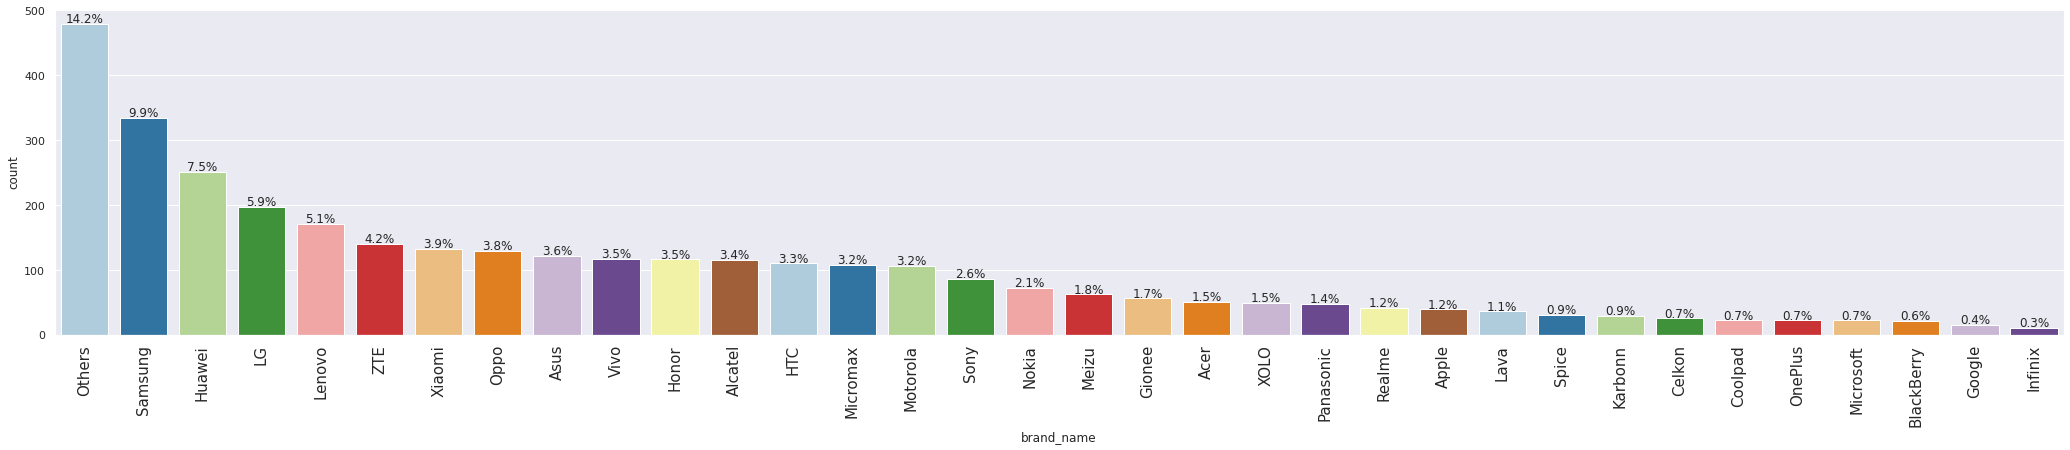

In [ ]:
dr_screen_size = dr[dr.screen_size > 6]


dr_screen_size.head()
labeled_barplot(dr_screen_size, "brand_name", perc=True)

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

The interesting number here is "Others" as it is the largest overall brand.

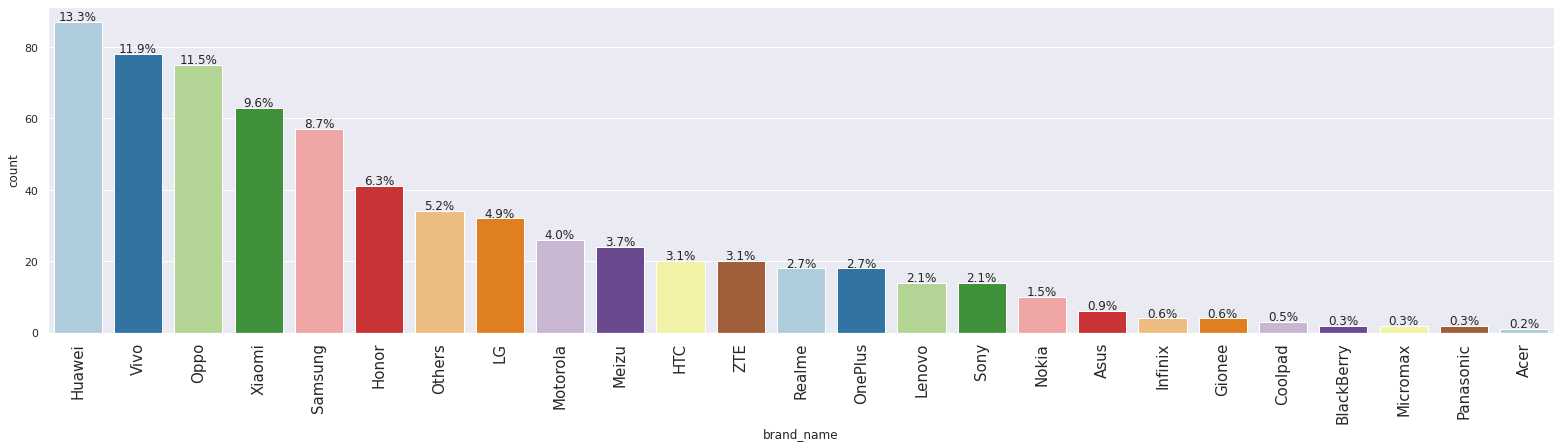

In [ ]:
dr_selfie_camera = dr[dr.selfie_camera_mp > 8]
dr_selfie_camera.head()
labeled_barplot(dr_selfie_camera, "brand_name", perc=True)

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands? 

Huwei, Vivo, Oppo, Xiaomi, Samsung, and Honor offer the largest selection of selfie cams over 8MP

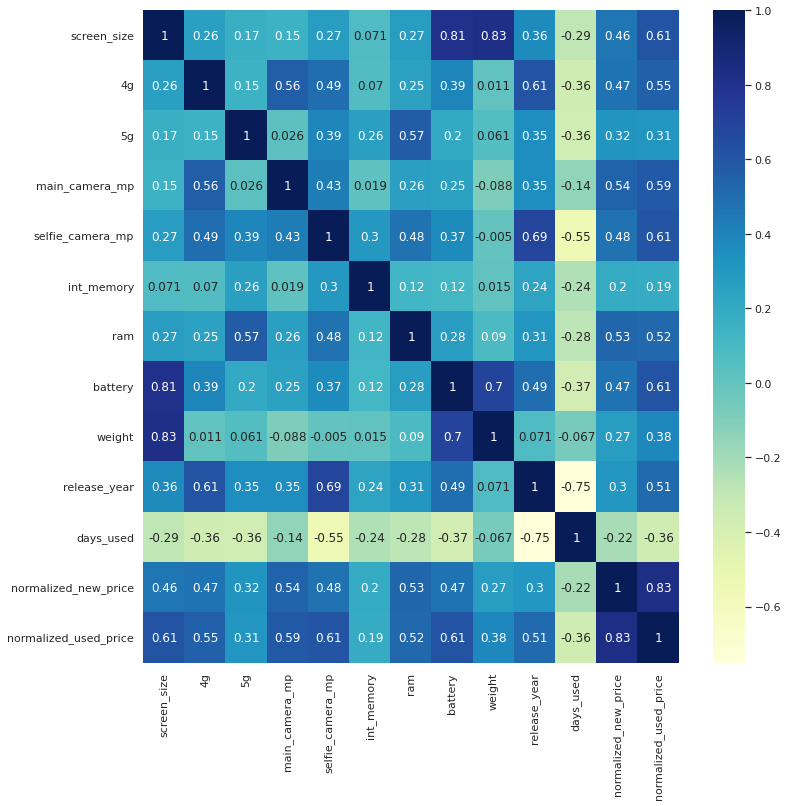

In [ ]:
dr_gconvert = dr
dr_gconvert = dr_gconvert.replace({'4g': {'yes': 1, 'no': 0}})
dr_gconvert = dr_gconvert.replace({'5g': {'yes': 1, 'no': 0}})
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(data=dr_gconvert[['brand_name','os','screen_size','4g','5g','main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight','release_year','days_used','normalized_new_price','normalized_used_price']].corr(), annot=True,  cmap='YlGnBu');

7. Which attributes are highly correlated with the normalized price of a used device?

Attributes highly correlated with the normalized price of a used device include the Normalized New Price, Release Year, Battery, Selfie Camera, Main Camera, 4G Capability and Screensize.

Basic Univariate Analyses

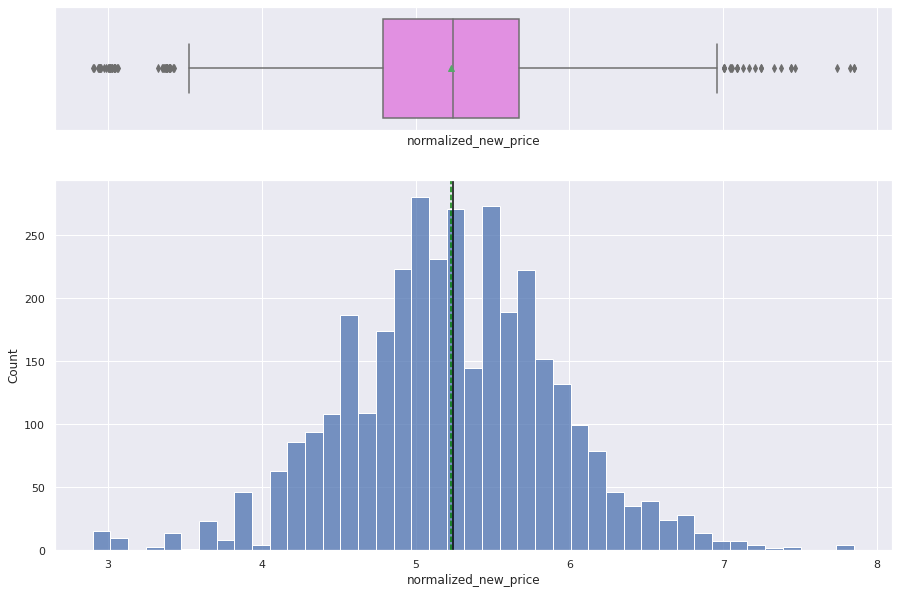

In [ ]:
histogram_boxplot(df, "normalized_new_price")

Normalized New Price median is around 5.25. The dip around 5.5 is interesting to note and keeps the data from a true normal distribution.

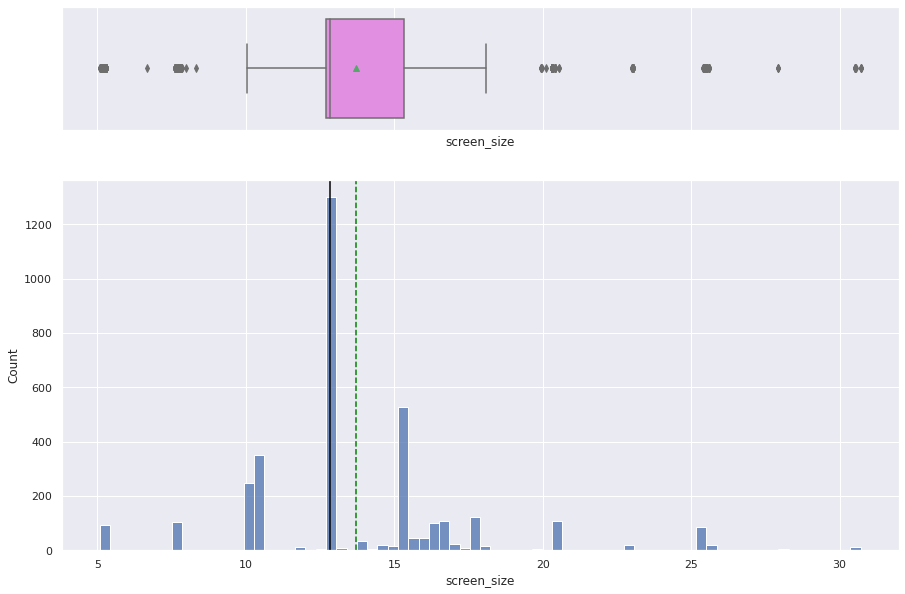

In [ ]:
histogram_boxplot(df, "screen_size")

Screen sizes are very widely spread out which makes sense given the sizing differences between phones and tablets.

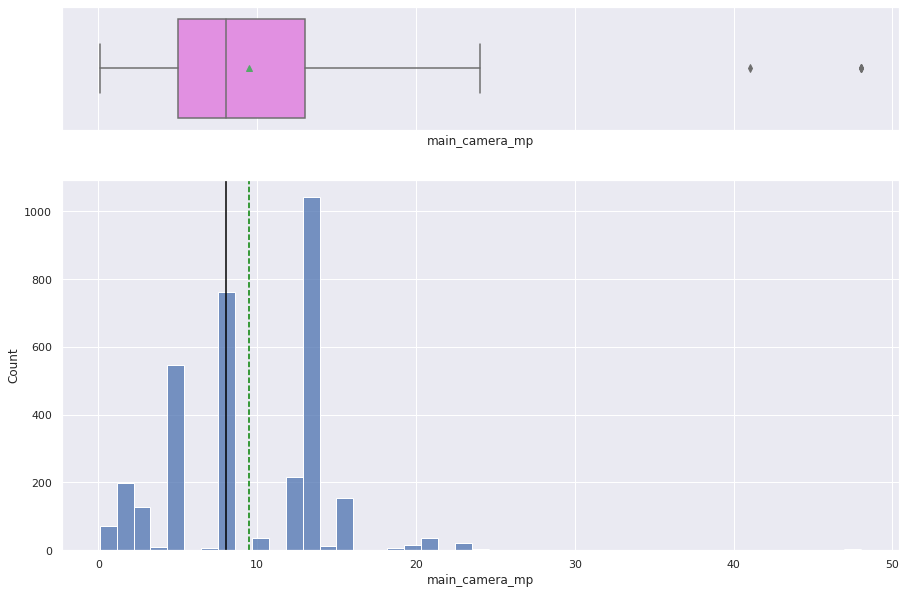

In [ ]:
histogram_boxplot(df, "main_camera_mp")

While the bulk of cameras tend to be in the 5 to 12 range there are a couple of outliers in the 40's.

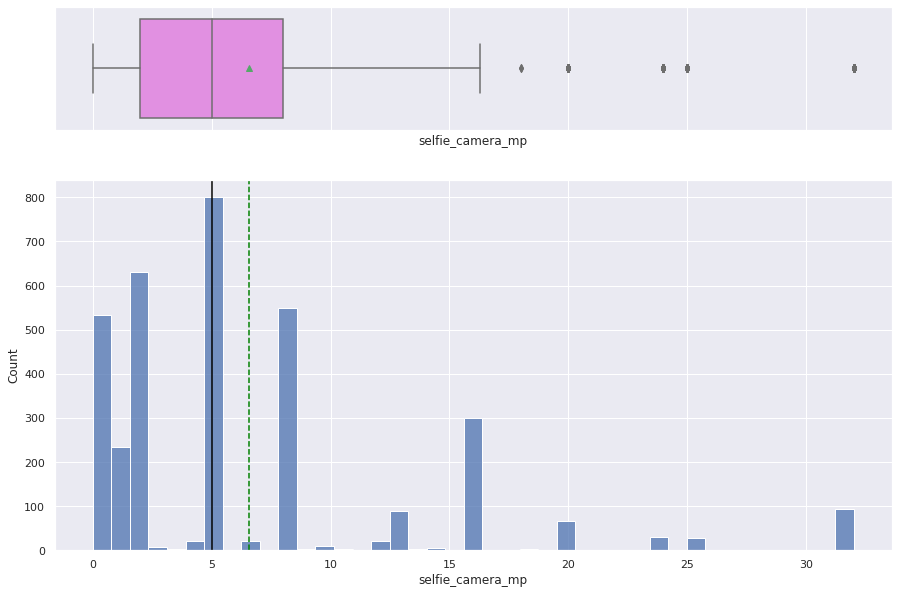

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

Selfie cams are not as powerful as main cams. This can be seen in the median and outliers being substantially lower than the ones shown in the graph above.

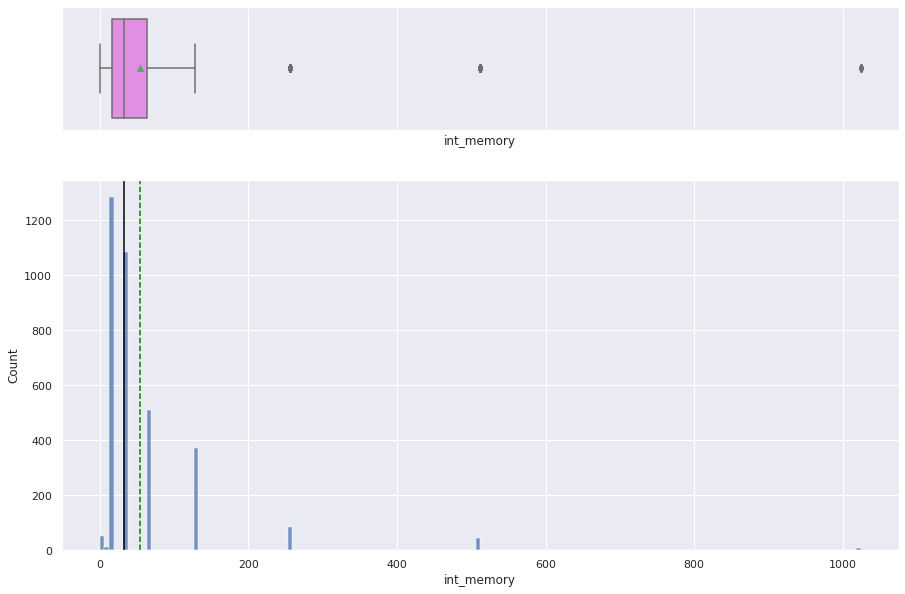

In [ ]:
histogram_boxplot(df, "int_memory")

Memory on most phones tends to be quite low. The upper outliers must be assumed to be larger format tablets.

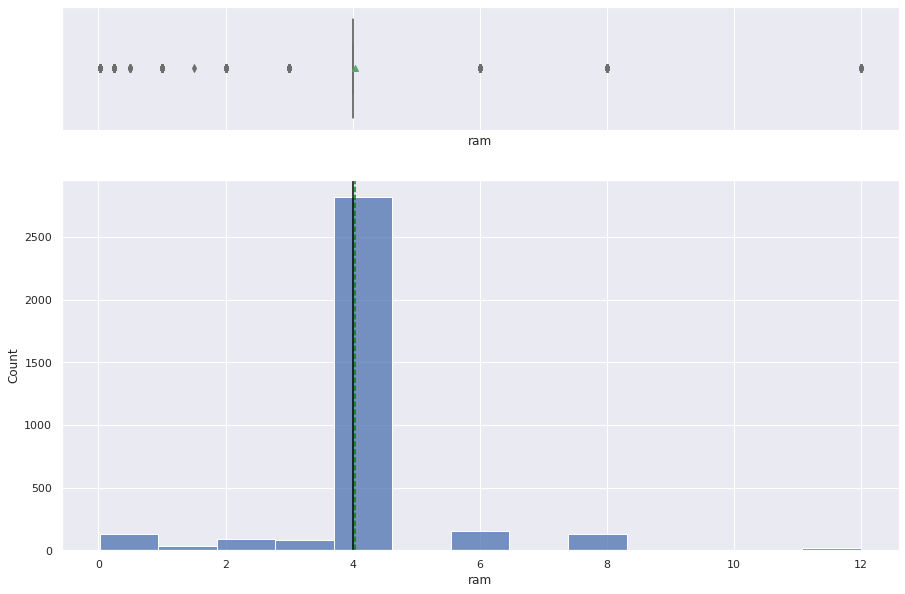

In [ ]:
histogram_boxplot(df, "ram")

On most phones and bargain tablets, the RAM falls squarely around 4. The upper end can be assumed to be accounted for by tablets.

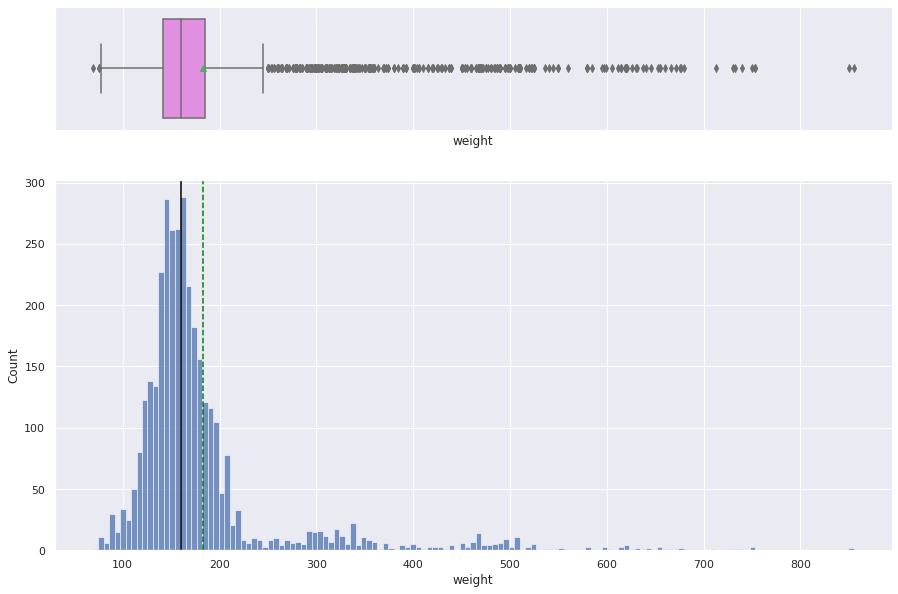

In [ ]:
histogram_boxplot(df, "weight")

Weight shows a great many outliers due to the lack of standard sizing in devices and features.

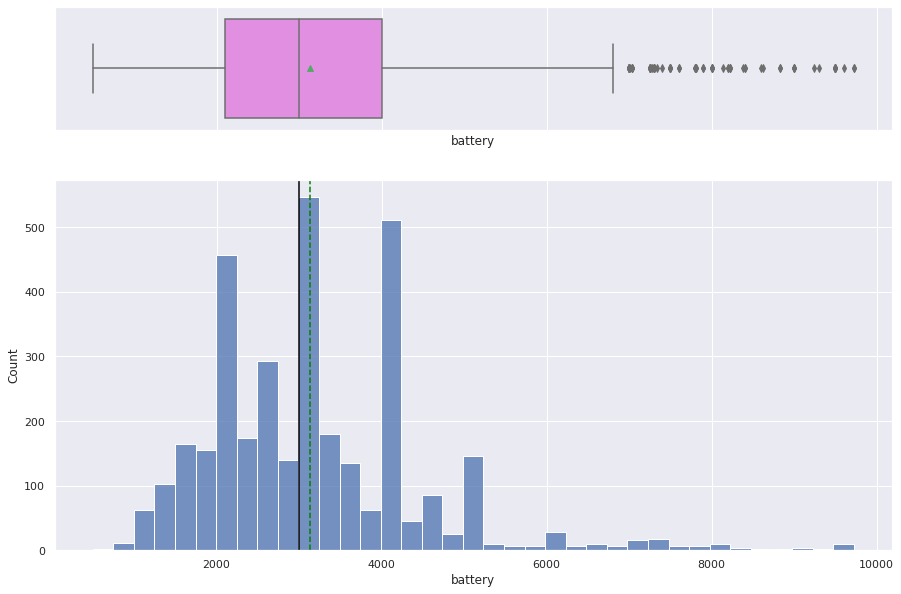

In [ ]:
histogram_boxplot(df, "battery")

Battery sizes are most heavily clustered between 2000 and 4000.

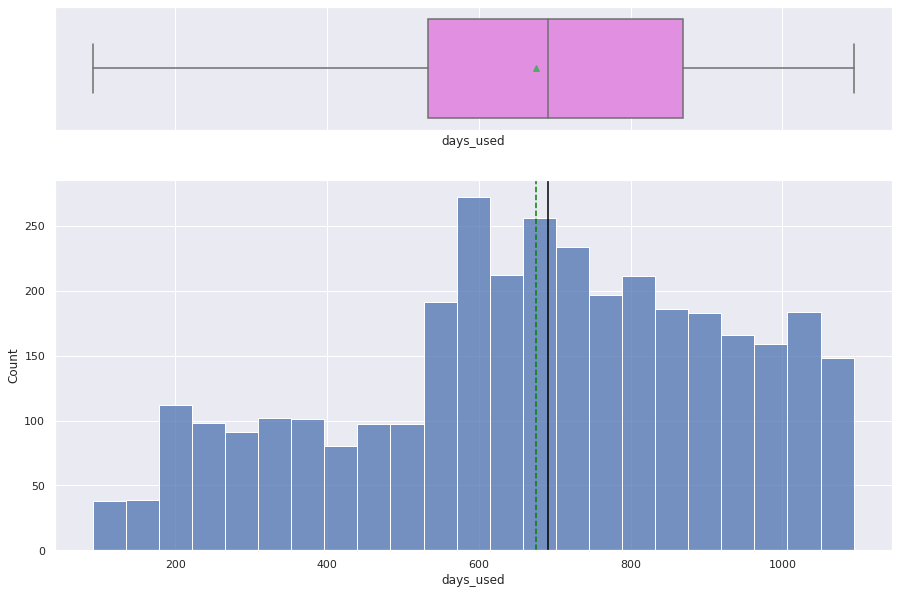

In [ ]:
histogram_boxplot(df, "days_used")

Data shows that people tend to use their devices for at least two years.

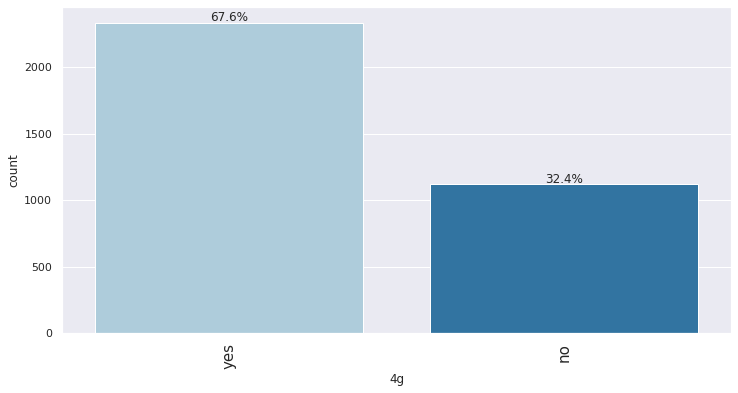

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10)

Two thirds of all devices are 4g capable.

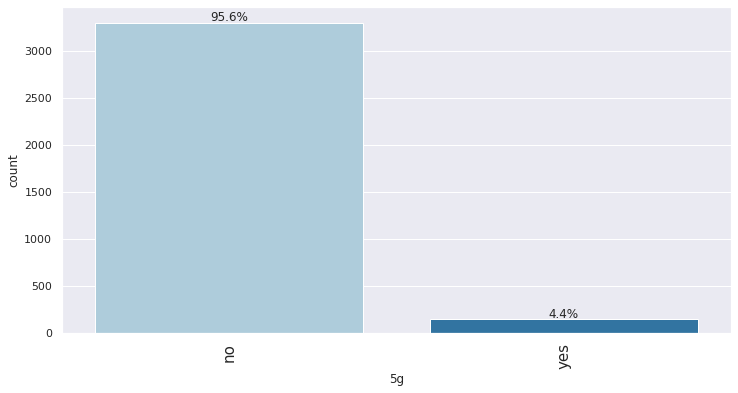

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10)

Less than 4.5% of devices are 5g capable which makes sense given the age of most used devices.

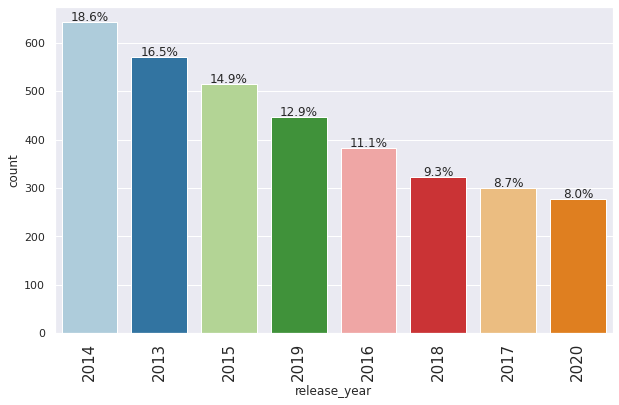

In [ ]:
labeled_barplot(dr, "release_year", perc=True,)

Exactly 50% of devices were released before 2015 which provides context for the low level of 5g availability noted above.

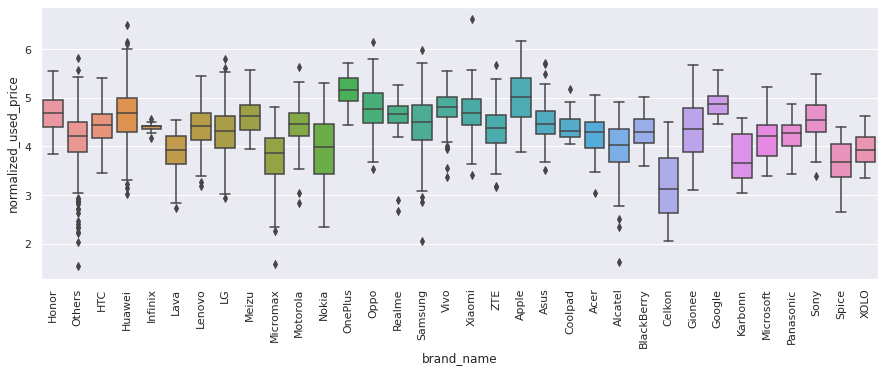

In [ ]:

plt.figure(figsize=(15, 5))
sns.boxplot(data=dr, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

Despite brand,  the vast majority of used pricing remains in the 4-5 range with the exception of Apple and One Plus at the top and a handful of the smaller brands at the bottom.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Code to restate the head of the dataframe
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


Restating the head of the dataset.

In [ ]:
#Code to restate the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Restating the basic data type info.

In [ ]:
#Code to restate the null values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Restating the Null values and preparing to replace Nulls with meidan values.

In [ ]:
#Code to group the columns by release year and brand name then impute the median into some of the null values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(['release_year', 'brand_name'])[col].transform("median")
    ) 

In [ ]:
#Null value check
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#Code to group the columns by brand name then impute the median into some of the null values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(['brand_name'])[col].transform("median")
    ) 

In [ ]:
#Yet another null value check
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
#Code to replace the last of the null values with the main_camera_mp median
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

In [ ]:
#Final Null value check to confirm there are no more null values
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All Null values have been replaced in the dataset and we are ready to move forward.

In [ ]:
#Code to replace release_year with years_since_release to a better datapoint
df["years_since_release"] = 2022 - df["release_year"]
df.drop("release_year", axis=1, inplace=True)

Replacing Release Year with Years Since Release to get a better grasp of the device's age.

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,2
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,2
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,2
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,2
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,2


Restating the dataset's head again to show the new Years Since Release Column.

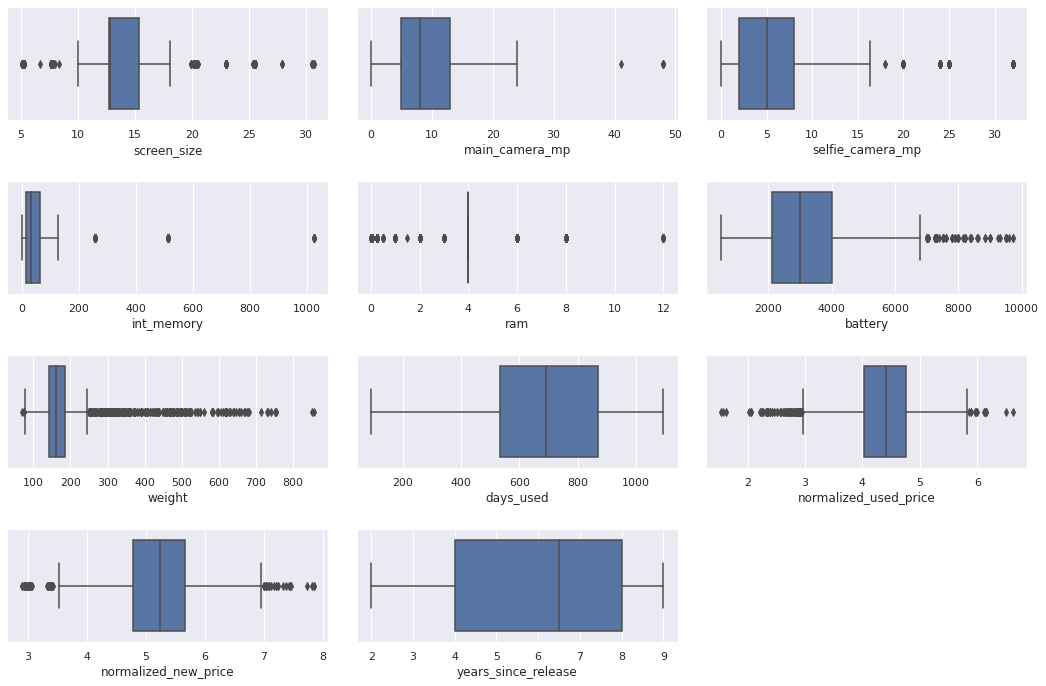

In [ ]:
#Code to detect outliers plot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

There are a great many outliers but given the vast differences between tablets and phones, it is best to keep all values.

In [ ]:
df.drop("brand_name", axis=1, inplace=True)
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,2
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,2
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,2
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,2
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,2


As was demonstrated in the data analyses above, the brand names are not especially helpful so I have made the decision to drop them before moving on with the model.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
de = df.copy()

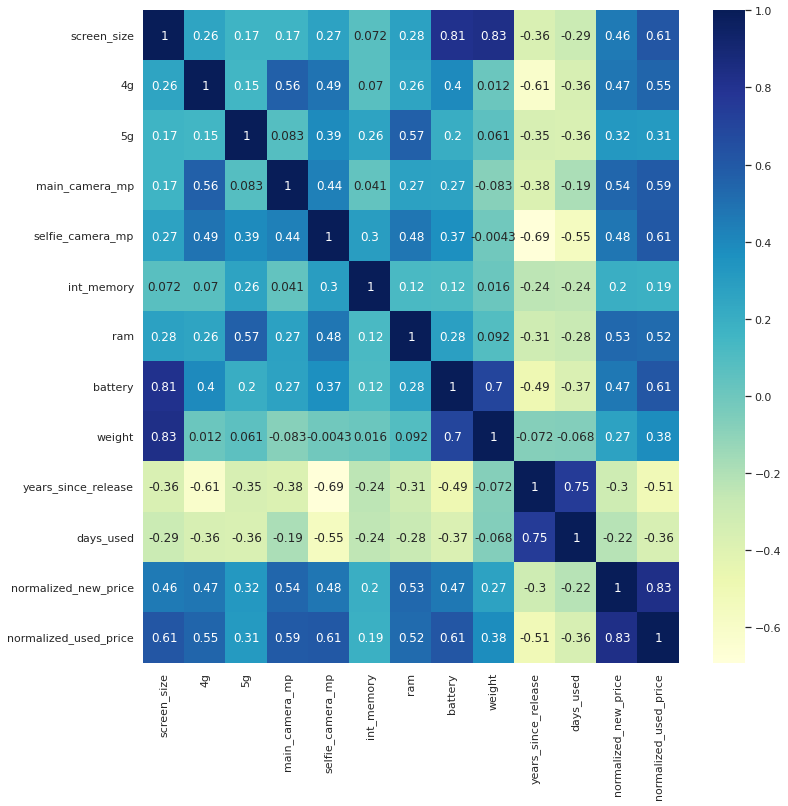

In [ ]:
#Rebuilding the heatmap with the new columns
dr_gconvert = de
dr_gconvert = dr_gconvert.replace({'4g': {'yes': 1, 'no': 0}})
dr_gconvert = dr_gconvert.replace({'5g': {'yes': 1, 'no': 0}})
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(data=dr_gconvert[['os','screen_size','4g','5g','main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight','years_since_release','days_used','normalized_new_price','normalized_used_price']].corr(), annot=True,  cmap='YlGnBu');


Screen size, camera power, ram, battery, and normalized new price remain the most relevant factors in determining normalized used price.

Original Main Camera Data


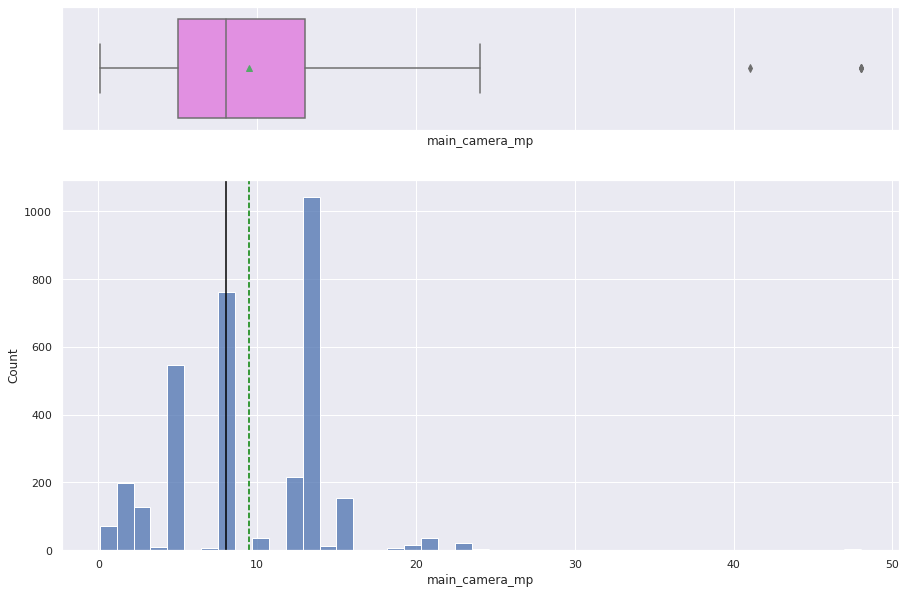

In [ ]:
print("Original Main Camera Data")
histogram_boxplot(dr, "main_camera_mp")


Updated Main Camera Data


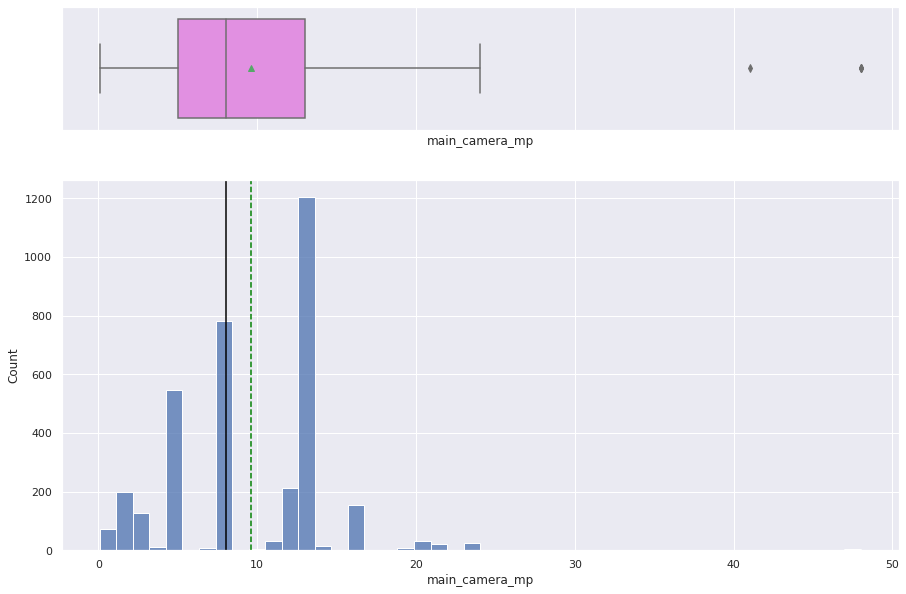

In [ ]:
print("Updated Main Camera Data")
histogram_boxplot(de, "main_camera_mp")

There are noticeable changes, albeit minor, in the main camera data between the original set and the manipulated set. I have chosen to focus on this since it had the most values added to it during the process of Null value replacement.

In [ ]:
print("Data Description of original data sample")
dr.describe()

Data Description of original data sample


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
print("Data Description after manipulation")
de.describe()

Data Description after manipulation


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.617597,6.555067,54.528474,4.032620,3132.577446,182.636856,674.869716,4.364712,5.233107,6.034742
std,3.805280,4.749438,6.968440,84.934991,1.368598,1298.884193,88.360445,248.580166,0.588914,0.683637,2.298455
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,91.000000,1.536867,2.901422,2.000000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,533.500000,4.033931,4.790342,4.000000
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,690.500000,4.405133,5.245892,6.500000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,868.750000,4.755700,5.673718,8.000000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,1094.000000,6.619433,7.847841,9.000000


The data descriptions above show any changes brought about to the sample by the manipulations we have brought about. There is a slight increase in the main camera mp column's mean and standard deviation brought about by the replacement of the Null values. We can also see the new columns present in new years since release column reflected in the post manipulation description and can note the absence of the release year column.

## Model Building - Linear Regression

In [ ]:
# defining X and y variables
X = df.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

print(X.head())
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        25.50  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    2  
1                    2  
2                    2  
3                    2  
4              

In [ ]:
#Code to add the intercept to the data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Code for creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
#First five rows with the dummy variables in place
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,2,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,2,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,2,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,2,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,2,0,0,0,1,0


When creating the dummy variables for the model, operting system will be used since brand name was dropped and 4g and 5g have been converted to ones and zeroes to identify their presense. 

In [ ]:
#Code to split the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
#Code to print the number of rows in the train and test models
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
#Code to display the stats on the train model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     850.5
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                           13:14:56   Log-Likelihood:                 98.614
No. Observations:                   2417   AIC:                            -165.2
Df Residuals:                       2401   BIC:                            -72.58
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Model Performance Check

In [ ]:
#Group of functions to compute and display a more readable version of relevant model data
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
#Code to check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232297,0.18226,0.841612,0.840556,4.377609


In [ ]:
#Code to check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236589,0.183001,0.844808,0.842374,4.467715


All of the above was just to set a baseline before we begin checking assuptions in the next section.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.


Test for Multicollinarity via VIF

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    #Code to calculate VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
#Code to display VIF
checking_vif(x_train)

,feature,VIF
0,const,129.211031
1,screen_size,7.245006
2,main_camera_mp,1.996930
3,selfie_camera_mp,2.575590
4,int_memory,1.247856
5,ram,2.117161
6,battery,3.848932
7,weight,6.127196
8,days_used,2.578113
9,normalized_new_price,2.632565


Note that Weight and Screen Size are the only relevant items with a VIF over 5 (Const and Dummy Variables are omitted from consideration)

In [ ]:
#Code to check and remove items with a VIF over 5
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837274,0.235506
1,screen_size,0.836820,0.235834


In [ ]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,110.785803
1,screen_size,3.402137
2,main_camera_mp,1.903762
3,selfie_camera_mp,2.541463
4,int_memory,1.247526
5,ram,2.113643
6,battery,3.469627
7,days_used,2.564951
8,normalized_new_price,2.626262
9,years_since_release,4.466062


Note that once Weight is dropped, Screen Size VIF falls below 5. This means it no longer needs to be removed as VIF scores that fall between 1 - 5 indicate low Multicollinearity. 

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     888.9
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                           13:15:20   Log-Likelihood:                 72.978
No. Observations:                   2417   AIC:                            -116.0
Df Residuals:                       2402   BIC:                            -29.10
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Dealing with high p-value variables

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                           13:15:28   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


Training and Test are both close to one another and look very promising so far.

Test for Linearity and Independence

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.864746,0.222741
1525,4.448399,4.571687,-0.123288
1128,4.315353,4.284426,0.030926
3003,4.282068,4.258956,0.023112
2907,4.456438,4.451207,0.005231


Values here are close to on another indicating a good model for predicition.

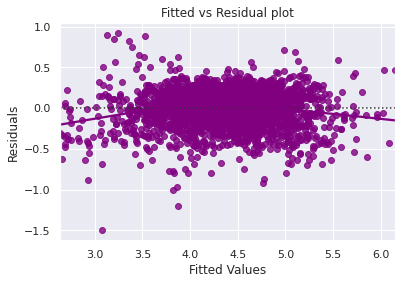

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

No discernable pattern is visible. Linearity test passed.

Test for Normality

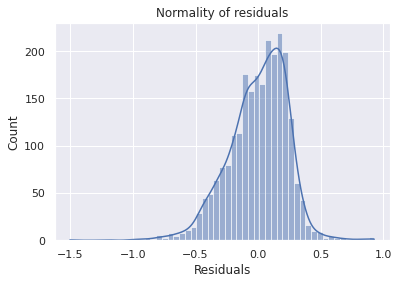

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

While there is a slight skew, the data is normally distributed.

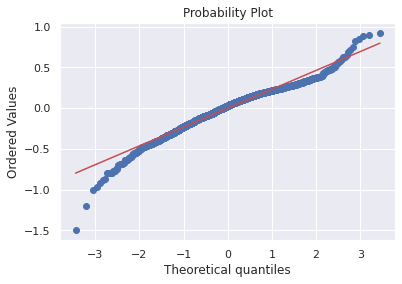

In [ ]:
#probability plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The Q-Q Plot show a mostly normal distribution with deviations at the head and tail.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9712681770324707, pvalue=1.2961150775333427e-21)

The P-value in the Shapiro test is way below .05 which would lead to rejection of the Null Hypothesis but since the Q-Q plot and histogram above both show largely normal distributions, we will ignore it.

Test for Homoscedasticity

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0648757500800878), ('p-value', 0.13825250199575034)]

As you can see, the p-value is higher than 0.05 proving the residuals to be homoscedastic and of constant variance.

Predictions on Test Data

In [ ]:
## predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.377852
2341,3.696103,3.960691
1913,3.592093,3.766597
688,4.306495,4.104456
650,4.522115,5.122448
2291,4.259294,4.398194
40,4.997685,5.410093
1884,3.875359,4.111013
2538,4.206631,4.049228
45,5.380450,5.307608


Actual and predicted values on the test set are very similar.

In [ ]:
## predictions on the train set
pred = olsmod2.predict(x_train3)

df_pred_test = pd.DataFrame({"Actual": y_train, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
448,4.094345,4.044629
2129,4.839768,4.838564
2921,5.399836,5.180478
2133,4.966614,4.963249
3011,3.977811,4.038136
2574,4.145038,3.390851
2948,4.424367,4.427234
3103,4.240751,4.169291
1905,3.898532,4.168801
832,3.798406,3.808247


Actual and predicted values on the train set are also very similar.

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
#Code to create the final model summary
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                           13:16:01   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Evaluating the model parameters
olsmodel_final.params

const                   1.264481
screen_size             0.043264
main_camera_mp          0.018808
selfie_camera_mp        0.013292
ram                     0.015639
days_used               0.000063
normalized_new_price    0.425507
years_since_release    -0.019339
4g_yes                  0.036477
dtype: float64

In [ ]:
#Code to check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [ ]:
#Code to check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


This model will explain 84% of the data variation. MAPE indicates that it explains 4.5% of normalized used prices. RMSE and MAE are both low and show closely related to in the test and training versions of the model meaning that overfitting is not an issue. Generally, I would say the model is a good one.

## Actionable Insights and Recommendations 

It should come as no surprise to anyone that newer devices with better cameras, more ram, and higher original new price would provide higher used prices and the regression model backs this up.

The following can be concluded given the data and the model:

* The model is able to explain 84% of the variation in the data and 4.5% of the used prices on the dataset, meaning it works well for prediction and inference.

* If the screen size increases by .043 units and all other variables remain constant, the used price will increase by a pricing unit. This makes perfect sense, considering how much more expensive tablets can be as opposed to similarly equipped phones.

* For every year since release, the used price of the unit decreases by .02 units so long as all other variables remain constant. Older devices tend to have lesser internal tech and everyday wear and tear can be highly detrimental to continued performance in devices that are built around the principle of planned obsolescence.

* For every increase of .43 units in new price, the used price may be increased by a single unit provided all other variables remain constant. This tracks as well given that, even though all new devices depreciate, the more expensive ones have more to lose and are generally better equipped with higher, more reliable tech that buffers them against technological irrelevance.

My overall recommendation would be for ReCell to focus on newer, higher priced devices (both phones and tablets) to create a steady demand and commensurate profits. 

In future data samples, I would recommend attempting to separate out phones from tablets as their primary functionality and use-case can differ dramatically thereby changing consumer perception and pricing strategy.  



 


___